<a href="https://colab.research.google.com/github/mohammad-hosein/CIFAR10-CNN/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential

In [ ]:
#CIFAR10
(x_train, y_train), (x_test, y_test) =cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

array([2], dtype=uint8)

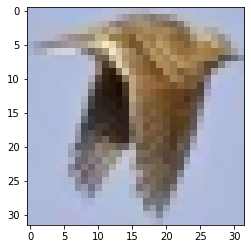

In [ ]:
test_img = x_train[123]
plt.imshow(test_img)
y_train[123]

In [ ]:
x_train = x_train.reshape(-1,32*32*3)/255.
x_train.shape

(50000, 3072)

In [ ]:
x_train[0]

In [ ]:
x_test = x_test.reshape(-1,32*32*3)/255.
x_test.shape

(10000, 3072)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape=(32*32*3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 2,371,594
Trainable params: 2,371,594
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train_cat, batch_size=128, epochs=30, validation_data=(x_test,y_test_cat))

Epoch 1/30
391/391 [==============================] - 5s 10ms/step - loss: 2.0832 - accuracy: 0.3484 - val_loss: 2.2214 - val_accuracy: 0.2637
Epoch 2/30
391/391 [==============================] - 3s 8ms/step - loss: 1.6778 - accuracy: 0.4715 - val_loss: 2.0709 - val_accuracy: 0.3397
Epoch 3/30
391/391 [==============================] - 3s 8ms/step - loss: 1.5618 - accuracy: 0.5088 - val_loss: 2.1832 - val_accuracy: 0.3396
Epoch 4/30
391/391 [==============================] - 3s 8ms/step - loss: 1.4453 - accuracy: 0.5458 - val_loss: 2.0903 - val_accuracy: 0.3276
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 1.3773 - accuracy: 0.5641 - val_loss: 1.7034 - val_accuracy: 0.4548
Epoch 6/30
391/391 [==============================] - 3s 8ms/step - loss: 1.2967 - accuracy: 0.5948 - val_loss: 1.6786 - val_accuracy: 0.4614
Epoch 7/30
391/391 [==============================] - 3s 8ms/step - loss: 1.2443 - accuracy: 0.6148 - val_loss: 1.6238 - val_accuracy: 0.4806
Epoch

# CNN

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
from keras.utils import to_categorical
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras import regularizers, optimizers
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
x_train = x_train.reshape(-1, 32, 32, 3)/255.
x_test = x_test.reshape(-1, 32, 32, 3)/255.

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=x_train[0].shape))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2

In [ ]:
model.fit(x_train, y_train_cat, batch_size=128, epochs=30, validation_data=(x_test,y_test_cat))

Epoch 1/30
391/391 [==============================] - 12s 25ms/step - loss: 2.6401 - accuracy: 0.2522 - val_loss: 1.4386 - val_accuracy: 0.4869
Epoch 2/30
391/391 [==============================] - 9s 23ms/step - loss: 1.3133 - accuracy: 0.5325 - val_loss: 1.2437 - val_accuracy: 0.5678
Epoch 3/30
391/391 [==============================] - 9s 23ms/step - loss: 1.0521 - accuracy: 0.6309 - val_loss: 1.1073 - val_accuracy: 0.6176
Epoch 4/30
391/391 [==============================] - 9s 23ms/step - loss: 0.8735 - accuracy: 0.6896 - val_loss: 1.1049 - val_accuracy: 0.6274
Epoch 5/30
391/391 [==============================] - 9s 23ms/step - loss: 0.7239 - accuracy: 0.7479 - val_loss: 1.1827 - val_accuracy: 0.6139
Epoch 6/30
391/391 [==============================] - 9s 23ms/step - loss: 0.6407 - accuracy: 0.7747 - val_loss: 1.1383 - val_accuracy: 0.6306
Epoch 7/30
391/391 [==============================] - 9s 23ms/step - loss: 0.5310 - accuracy: 0.8160 - val_loss: 1.2037 - val_accuracy: 0.645


# CNN WITH HIGHER ACCURACY
**CNN+Dropout+Kernel_regularizer+BatchNormalization**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D, Activation, Flatten, Dropout, BatchNormalization,MaxPool2D,Input
from keras import regularizers, optimizers
#CIFAR10
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
from tensorflow.keras.utils import to_categorical


In [ ]:
x_train = x_train.reshape(-1, 32, 32, 3)/255.
x_test = x_test.reshape(-1, 32, 32, 3)/255.

In [ ]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3),activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)       

In [ ]:
model.fit(x_train, y_train_cat, batch_size=64, epochs=20, validation_data=(x_test,y_test_cat))

Epoch 1/20
782/782 [==============================] - 39s 10ms/step - loss: 1.7266 - accuracy: 0.3966 - val_loss: 1.1973 - val_accuracy: 0.5871
Epoch 2/20
782/782 [==============================] - 7s 10ms/step - loss: 1.0491 - accuracy: 0.6425 - val_loss: 0.8541 - val_accuracy: 0.7212
Epoch 3/20
782/782 [==============================] - 8s 10ms/step - loss: 0.8648 - accuracy: 0.7146 - val_loss: 0.9565 - val_accuracy: 0.6902
Epoch 4/20
782/782 [==============================] - 8s 10ms/step - loss: 0.7716 - accuracy: 0.7519 - val_loss: 0.7760 - val_accuracy: 0.7561
Epoch 5/20
782/782 [==============================] - 7s 10ms/step - loss: 0.7083 - accuracy: 0.7783 - val_loss: 0.7420 - val_accuracy: 0.7706
Epoch 6/20
782/782 [==============================] - 8s 10ms/step - loss: 0.6588 - accuracy: 0.7988 - val_loss: 0.7840 - val_accuracy: 0.7592
Epoch 7/20
782/782 [==============================] - 8s 10ms/step - loss: 0.6253 - accuracy: 0.8127 - val_loss: 0.6666 - val_accuracy: 0.808

# ACCURACY>84

# ANN WITH HIGHER ACCURACY
# Mitavan ba data augmentation amalkard ra behtar kard

In [ ]:
model = Sequential()
model.add(Input(shape=(32*32*3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu',))
model.add(Dense(512, activation='relu',))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 1,716,490
Trainable params: 1,716,490
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train_cat, batch_size=64, epochs=30, validation_data=(x_test,y_test_cat))

Epoch 1/30
782/782 [==============================] - 6s 4ms/step - loss: 1.9721 - accuracy: 0.2706 - val_loss: 1.7015 - val_accuracy: 0.3921
Epoch 2/30
782/782 [==============================] - 3s 4ms/step - loss: 1.7066 - accuracy: 0.3845 - val_loss: 1.6192 - val_accuracy: 0.4152
Epoch 3/30
782/782 [==============================] - 3s 4ms/step - loss: 1.6171 - accuracy: 0.4130 - val_loss: 1.6068 - val_accuracy: 0.4288
Epoch 4/30
782/782 [==============================] - 3s 4ms/step - loss: 1.5478 - accuracy: 0.4397 - val_loss: 1.5716 - val_accuracy: 0.4340
Epoch 5/30
782/782 [==============================] - 3s 4ms/step - loss: 1.4990 - accuracy: 0.4629 - val_loss: 1.5480 - val_accuracy: 0.4530
Epoch 6/30
782/782 [==============================] - 3s 4ms/step - loss: 1.4466 - accuracy: 0.4775 - val_loss: 1.5112 - val_accuracy: 0.4657
Epoch 7/30
782/782 [==============================] - 3s 4ms/step - loss: 1.4116 - accuracy: 0.4923 - val_loss: 1.5164 - val_accuracy: 0.4588
Epoch 

KeyboardInterrupt: ignored